# Importing Libraries

In [ ]:
# Imports Libraries
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [ ]:
# Initialises data
xData = np.array([2000, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2015.5])
yData = np.array([10, 98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397, 200])

# Plotting Confidence



In [ ]:
def ellipse(xData, yData, nStd, ax, **kwargs):
    # Renders ellipse using the following process
    # https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html

    cov = np.cov(xData, yData)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])

    radiusX = np.sqrt(1 + pearson) * 2
    radiusY = np.sqrt(1 - pearson) * 2

    meanX = np.mean(xData)
    meanY = np.mean(yData)

    scaleX = np.sqrt(cov[0, 0]) * nStd
    scaleY = np.sqrt(cov[1, 1]) * nStd

    transform = transforms.Affine2D() \
        .scale(scaleX, scaleY) \
        .translate(meanX, meanY)

    ellipse = Ellipse((0, 0), radiusX, radiusY, 45, **kwargs)
    ellipse.set_transform(transform + ax.transData)

    ax.add_patch(ellipse)

<ipython-input-231-9c9d8c27f541>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse((0, 0), radiusX, radiusY, 45, **kwargs)


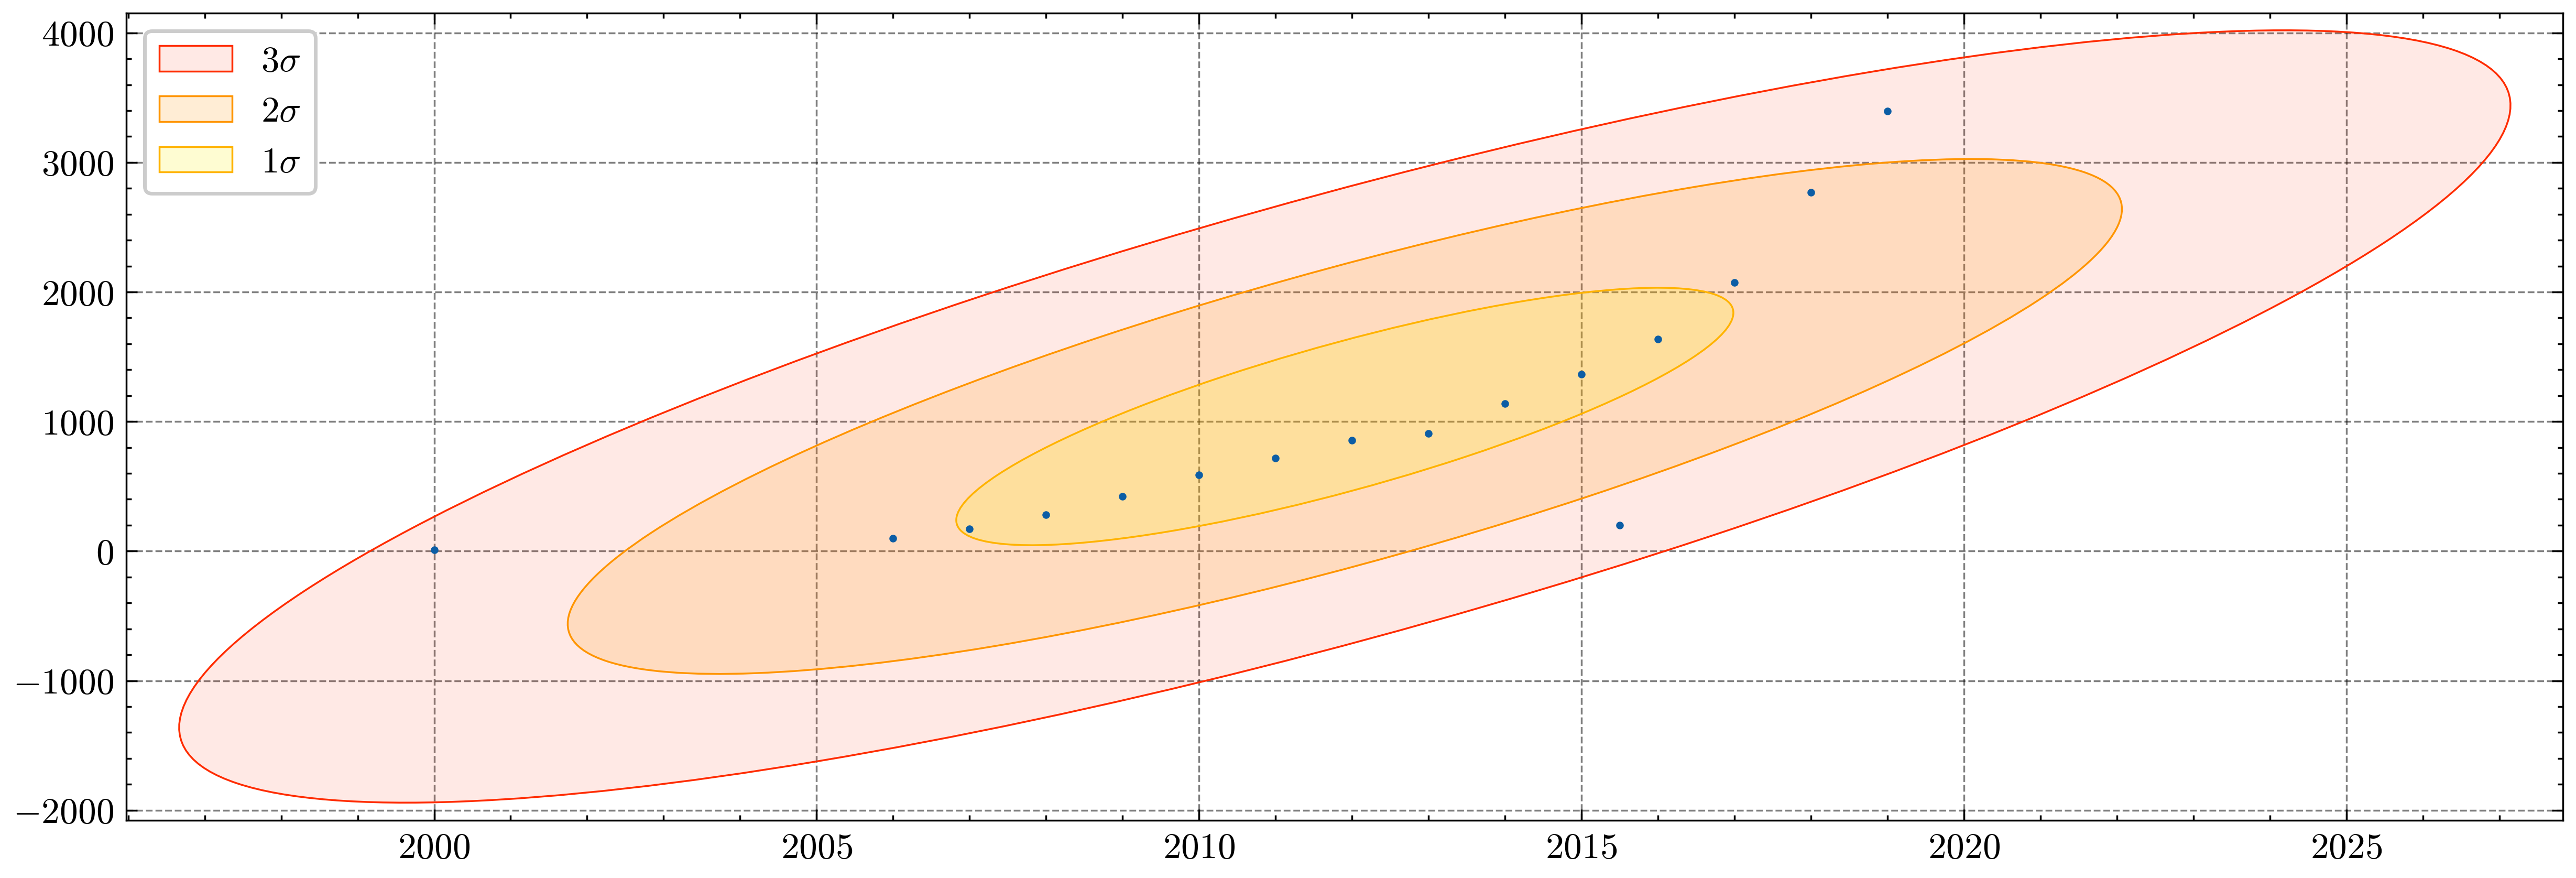

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plots data points
ax.scatter(xData, yData, s=1.2, zorder=4)

# Plots 1, 2 & 3 std ellipses
ellipse(xData, yData, 3, ax,
                   label=r'$3\sigma$', facecolor='#FF2C001A', edgecolor='#FF2C00', zorder=1, lw=0.5)
ellipse(xData, yData, 2, ax,
                   label=r'$2\sigma$', facecolor='#FF95002A', edgecolor='#FF9500', zorder=2, lw=0.5)
ellipse(xData, yData, 1, ax,
                   label=r'$1\sigma$', facecolor='#faf2002D', edgecolor='#ffb300', zorder=3, lw=0.5)

ax.legend()
plt.show()